In [20]:
import pandas as pd

In [35]:
df = pd.read_csv('/content/Data-Melbourne_F_fixed.csv')

In [66]:
print(f"Data Display: \n {df.head()}\n\n Data Size: {df.shape}\n\n Null Check: \n{df.isnull().sum()}")

Data Display: 
    Unnamed: 0  Average Outflow  Average Inflow  Energy Consumption  Ammonia  \
0           0            2.941           2.589            175856.0     27.0   
1           1            2.936           2.961            181624.0     25.0   
2           2            2.928           3.225            202016.0     42.0   
3           3            2.928           3.354            207547.0     36.0   
4           4            2.917           3.794            202824.0     46.0   

   Biological Oxygen Demand  Chemical Oxygen Demand  Total Nitrogen  \
0                     365.0                   730.0          60.378   
1                     370.0                   740.0          60.026   
2                     418.0                   836.0          64.522   
3                     430.0                   850.0          63.000   
4                     508.0                  1016.0          65.590   

   Average Temperature  Maximum temperature  Minimum temperature  \
0             

In [37]:
columns = df.columns.tolist()

In [38]:
import matplotlib.pyplot as plt

# for col in columns:
#   plt.plot(df[col])
#   plt.show()

# columns 11(Atmospheric pressure) and 14(Average visibility) have const value with one outlier, performing calculations to remove them,

In [39]:
df = df.drop(columns=['Atmospheric pressure', 'Average visibility'])

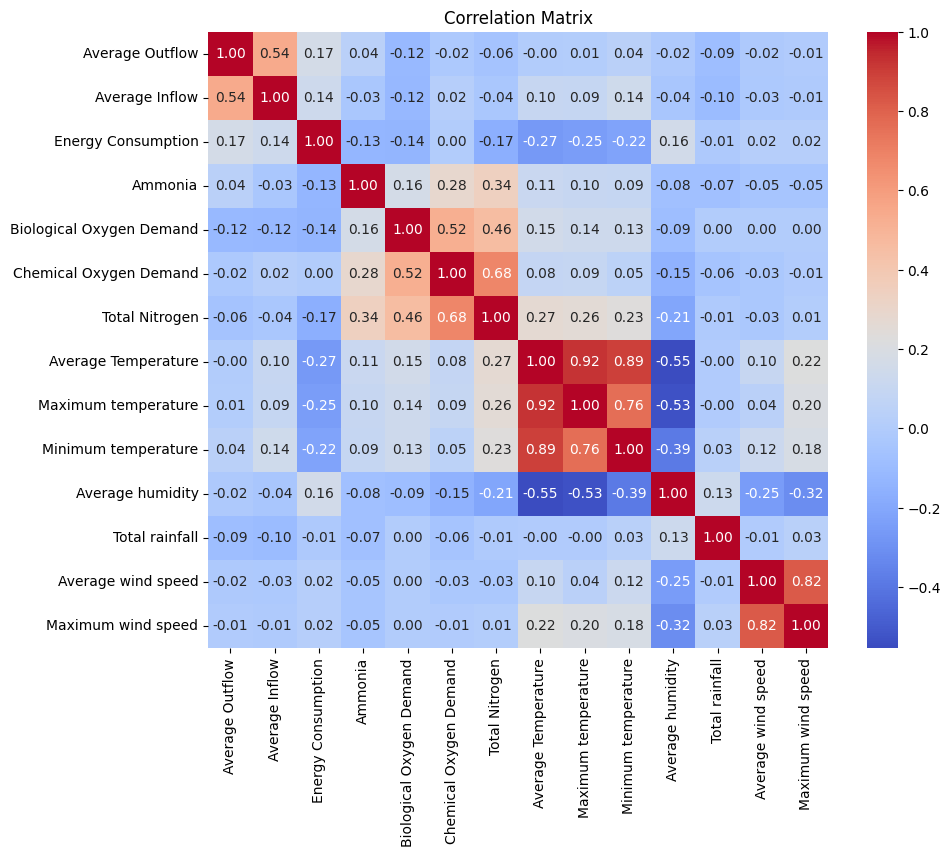

In [40]:
import seaborn as sns

df_x = df.copy()
df_x = df_x.drop(columns=['Year', 'Month', 'Day', 'Unnamed: 0'])
correlation_matrix = df_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [41]:
df_x.corr().sum()

,0
Average Outflow,1.462266
Average Inflow,1.660280
Energy Consumption,0.311164
Ammonia,1.723315
Biological Oxygen Demand,2.107465
Chemical Oxygen Demand,2.468229
Total Nitrogen,2.730834
Average Temperature,3.022648
Maximum temperature,2.822841
Minimum temperature,3.066916


In [42]:
# removing -ve correlation, "Energy Consumption" has the lowest correlation, suggesting that it can be a dependent variable

In [43]:
df_x = df_x.drop(columns=['Average humidity'])

In [44]:
for column in df_x.columns:
    print(f"Unique values in '{column}': {len(df_x[column].unique())}")

Unique values in 'Average Outflow': 1052
Unique values in 'Average Inflow': 1093
Unique values in 'Energy Consumption': 1379
Unique values in 'Ammonia': 48
Unique values in 'Biological Oxygen Demand': 214
Unique values in 'Chemical Oxygen Demand': 221
Unique values in 'Total Nitrogen': 355
Unique values in 'Average Temperature': 230
Unique values in 'Maximum temperature': 195
Unique values in 'Minimum temperature': 162
Unique values in 'Total rainfall': 32
Unique values in 'Average wind speed': 198
Unique values in 'Maximum wind speed': 49


In [45]:
df_x['Energy Consumption'] = df_x['Energy Consumption']/1000.0
# to KWh

In [46]:
df_x.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Total rainfall', 'Average wind speed', 'Maximum wind speed'],
      dtype='object')

In [47]:
df_x['Total Oxygen'] = df_x['Biological Oxygen Demand'] + df_x['Chemical Oxygen Demand']
df_x.drop(columns=['Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Maximum temperature', 'Minimum temperature'], inplace=True)

In [48]:
#since we have max and min temp, and avg temp there is no need for them
# also for max wind speed
df_x.drop(columns=['Maximum wind speed'], inplace=True)

In [49]:
df_x.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Total Nitrogen', 'Average Temperature', 'Total rainfall',
       'Average wind speed', 'Total Oxygen'],
      dtype='object')

In [56]:
df_x.drop(columns=['Total rainfall'], inplace=True)

In [57]:
df_x['Total Oxygen']  = df_x['Total Oxygen']/100.0

In [58]:
df_x.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Total Nitrogen,Average Temperature,Average wind speed,Total Oxygen
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.159089,39.222302,62.740752,15.036686,19.482706,12.280221
std,1.228778,1.439583,44.640534,7.761598,3.571035,5.398491,7.136868,2.040870
min,0.000004,2.589000,116.638000,13.000000,40.000000,0.000000,0.000000,5.000000
25%,3.074500,3.643250,246.435750,34.000000,61.396000,10.800000,14.400000,11.000000
50%,3.701000,4.161500,275.808000,39.000000,62.957500,14.300000,18.100000,12.200000
75%,4.498750,4.847750,305.703750,44.000000,64.366000,18.575000,23.300000,13.275000
max,7.920000,18.968000,398.328000,93.000000,92.000000,35.500000,49.100000,25.500000


In [59]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X=df_x.drop(columns=['Energy Consumption'])
y=df_x['Energy Consumption']

X_scaled = scale.fit_transform(X)

In [63]:
X_scaled.shape

(1382, 7)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [72]:
import numpy as np

def add_bias_term(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_bias = add_bias_term(X_train)
X_test_bias = add_bias_term(X_test)

class LinearRegressionScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_transpose = X.T
        self.weights = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    def predict(self, X):
        return X @ self.weights

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

lr = LinearRegressionScratch()

lr.fit(X_train_bias, y_train)

y_pred = lr.predict(X_test_bias)

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 32.57998285124636
Mean Squared Error (MSE): 1766.2765295862912
Root Mean Squared Error (RMSE): 42.02709280436004
R² Score: 0.07271470505502331
Explained Variance Score: 0.07286114999670223


In [77]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [82]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "CatBoost": CatBoostClassifier(verbose=0)
}

y_binned = np.digitize(y, bins=np.percentile(y, [33, 66]))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    if y_prob is not None and len(np.unique(y_binned)) > 2:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
    elif y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = "N/A"

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.4224
F1 Score: 0.4046
ROC AUC Score: 0.5980025482865121

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.52      0.47        90
           1       0.33      0.19      0.24        91
           2       0.45      0.55      0.50        96

    accuracy                           0.42       277
   macro avg       0.41      0.42      0.40       277
weighted avg       0.41      0.42      0.40       277

--------------------------------------------------
Training SVM...
Model: SVM
Accuracy: 0.4188
F1 Score: 0.4063
ROC AUC Score: 0.6268946145464939

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.51      0.50        90
           1       0.28      0.20      0.23        91
           2       0.44      0.54      0.49        96

    accuracy                           0.42       277
   macro avg       0.40 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.4910
F1 Score: 0.4864
ROC AUC Score: 0.6571512823192898

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57        90
           1       0.33      0.30      0.31        91
           2       0.60      0.55      0.57        96

    accuracy                           0.49       277
   macro avg       0.48      0.49      0.49       277
weighted avg       0.49      0.49      0.49       277

--------------------------------------------------
Training CatBoost...
Model: CatBoost
Accuracy: 0.4729
F1 Score: 0.4680
ROC AUC Score: 0.6436958237849603

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.57      0.52        90
           1       0.33      0.29      0.31        91
           2       0.57      0.56      0.57        96

    accuracy                           0.47       277
   macro avg       0.46      0.47      0.47       277
weig